## Adjust bathymetry to Coastline 

In [54]:
#to use the full width of the browser window uncomment the code below and execute the cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
from pyPoseidon.dem import *
from pyPoseidon.utils.fix import *

In [3]:
class Basemap(Basemap):
    """ Modify Basemap to use Natural Earth data instead of GSHHG data """
    def drawcoastlines(self):
        shapefile = '/Users/brey/DATA/COASTLINES/naturalearth/coastline/ne_%sm_coastline' % \
                    {'l':110, 'i':50, 'h':10}[self.resolution]
        self.readshapefile(shapefile, 'coastline', linewidth=1.)
#    def drawcountries(self):
#        shapefile = '/Users/brey/Downloads/data/naturalearth/countries/ne_%sm_admin_0_countries' % \
#                    {'l':110, 'm':50, 'h':10}[self.resolution]
#        self.readshapefile(shapefile, 'countries', linewidth=0.5)




In [4]:
%matplotlib notebook

In [5]:
dic = {'minlon' : 0., # lat/lon window
       'maxlon' : 13.,
       'minlat' : 54.5,
       'maxlat' : 66.5,
       'dpath':'/Users/brey/DATA/emodnet_bathymetry.nc'}

In [6]:
dic = {'minlon': -10., # lat/lon window
       'maxlon' : 5.,
       'minlat' : 46.,
       'maxlat' : 65.,
       'dpath':'/Users/brey/DATA/GEBCO_2014_2D.nc'}

In [8]:
dic={'minlon':-35., # lat/lon window
     'maxlon':43.,
     'minlat':24.5,
     'maxlat':76.5,
     'dpath':'/Users/brey/DATA/GEBCO_2014_2D.nc'}

In [77]:
dic={'minlon':165., # lat/lon window
     'maxlon':213.,
     'minlat':14.5,
     'maxlat':36.5,
     'dpath':'/Users/brey/DATA/GEBCO_2014_2D.nc'}

In [6]:
## lat,lon grid
lon=np.arange(dic['minlon'],dic['maxlon'],.1)
lat=np.arange(dic['minlat'],dic['maxlat'],.1)
x, y = np.meshgrid(lon,lat)

In [7]:
dic.update({'grid_x':x, 'grid_y':y})

In [8]:
points=zip(x.flatten(),y.flatten())

## Compute bathymetry

In [9]:
b = emodnet(**dic)


extracting dem from /Users/brey/DATA/emodnet_bathymetry.nc

dem done


In [10]:
b.Dataset

<xarray.Dataset>
Dimensions:  (dlat: 5762, dlon: 6242, i: 5762, ilat: 120, ilon: 130, j: 6242, k: 120, l: 130)
Coordinates:
  * dlat     (dlat) float64 54.5 54.5 54.5 54.5 54.51 54.51 54.51 54.51 ...
  * dlon     (dlon) float64 -0.001099 0.0009841 0.003067 0.005151 0.007234 ...
  * ilat     (ilat) float64 54.5 54.6 54.7 54.8 54.9 55.0 55.1 55.2 55.3 ...
  * ilon     (ilon) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 ...
Dimensions without coordinates: i, j, k, l
Data variables:
    dlats    (i, j) float64 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 ...
    val      (dlat, dlon) float64 -61.2 -61.78 -62.17 -62.01 -61.87 -61.9 ...
    dlons    (i, j) float64 -0.001099 0.0009841 0.003067 0.005151 0.007234 ...
    ival     (ilat, ilon) float64 -61.94 -62.6 -62.92 -71.42 -66.6 -64.99 ...
    ilats    (k, l) float64 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 ...
    ilons    (k, l) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 ...

## use the shoreline

In [11]:
shapefile = '/Users/brey/DATA/COASTLINES/naturalearth/coastline/ne_%sm_coastline.shp' % \
                    {'l':110, 'i':50, 'h':10}['i']

In [12]:
wmask, cg = fix(b,shapefile)


optimize grid

eliminate isolated wet regions
1
2
3

done 


## Adjust bathymetry

In [13]:
bmatch(b,wmask)


resample bathymetry


/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/pyPoseidon-0.3.0-py2.7-macosx-10.9-x86_64.egg/pyPoseidon/utils/fix.py:141: RuntimeWarning: invalid value encountered in greater
  mx = np.ma.masked_array(dem.Dataset.dlons,dem.Dataset.val.values>0)
/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/pyPoseidon-0.3.0-py2.7-macosx-10.9-x86_64.egg/pyPoseidon/utils/fix.py:142: RuntimeWarning: invalid value encountered in greater
  my = np.ma.masked_array(dem.Dataset.dlats,dem.Dataset.val.values>0)



done 


In [16]:
b.Dataset

<xarray.Dataset>
Dimensions:  (dlat: 1439, dlon: 1560, i: 1439, ilat: 120, ilon: 130, j: 1560, k: 120, l: 130)
Coordinates:
  * dlat     (dlat) float64 54.5 54.51 54.52 54.53 54.54 54.55 54.55 54.56 ...
  * dlon     (dlon) float64 -0.004167 0.004167 0.0125 0.02083 0.02917 0.0375 ...
  * ilat     (ilat) float64 54.5 54.6 54.7 54.8 54.9 55.0 55.1 55.2 55.3 ...
  * ilon     (ilon) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 ...
Dimensions without coordinates: i, j, k, l
Data variables:
    dlats    (i, j) float64 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 ...
    val      (dlat, dlon) float32 -61.0 -63.0 -63.0 -63.0 -63.0 -63.0 -64.0 ...
    dlons    (i, j) float64 -0.004167 0.004167 0.0125 0.02083 0.02917 0.0375 ...
    ival     (ilat, ilon) float32 -61.0 -62.0 -63.0 -70.0 -66.0 -64.0 -59.0 ...
    ilats    (k, l) float64 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 54.5 ...
    ilons    (k, l) float64 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 1.1 ...
    fval     (ilat, ilon)

In [39]:
b.Dataset.fval.min(), b.Dataset.fval.max()

(<xarray.DataArray 'fval' ()>
 array(-3203.), <xarray.DataArray 'fval' ()>
 array(-1.))

In [18]:
dif = b.Dataset.ival.values - b.Dataset.fval.values

In [32]:
mdif = np.ma.masked_invalid(dif)

In [33]:
mdif.min(), mdif.max()

(-5.0, 147.0)

## on map ...

<IPython.core.display.Javascript object>


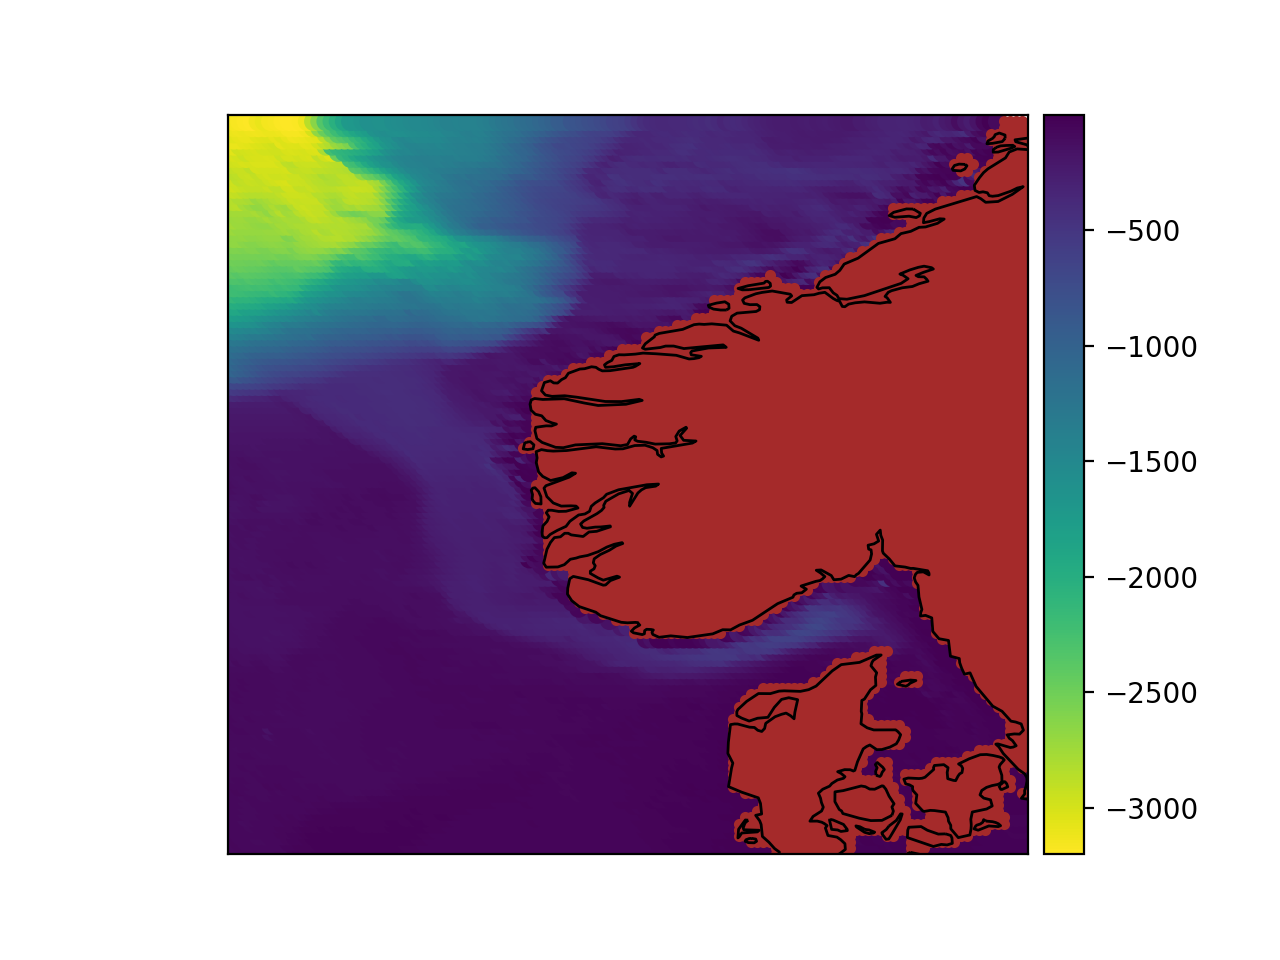

In [20]:
plt.figure()
m = Basemap(llcrnrlon=dic['minlon'], llcrnrlat=dic['minlat'], urcrnrlon=dic['maxlon'], urcrnrlat=dic['maxlat'],
            resolution='i')  # resolution = (l)ow | (i)intermediate | (h)igh
m.drawcoastlines()

In [21]:
gx=np.ma.masked_array(x,wmask)
gy=np.ma.masked_array(y,wmask)
#m.contourf(gx,gy,b.fval)
#overlay the corresponding bathymetry
m.scatter(gx,gy,c=b.Dataset.fval,cmap='viridis_r')
m.colorbar()
#masked points (land)
qx=np.ma.masked_array(x,np.invert(wmask))
qy=np.ma.masked_array(y,np.invert(wmask))
m.scatter(qx,qy,marker='.',color='brown')

In [34]:
fps = np.argwhere( mdif > 0.)

/Users/brey/miniconda3/envs/dev/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.


In [35]:
fps.shape

(68, 2)

### Contour plot

<IPython.core.display.Javascript object>


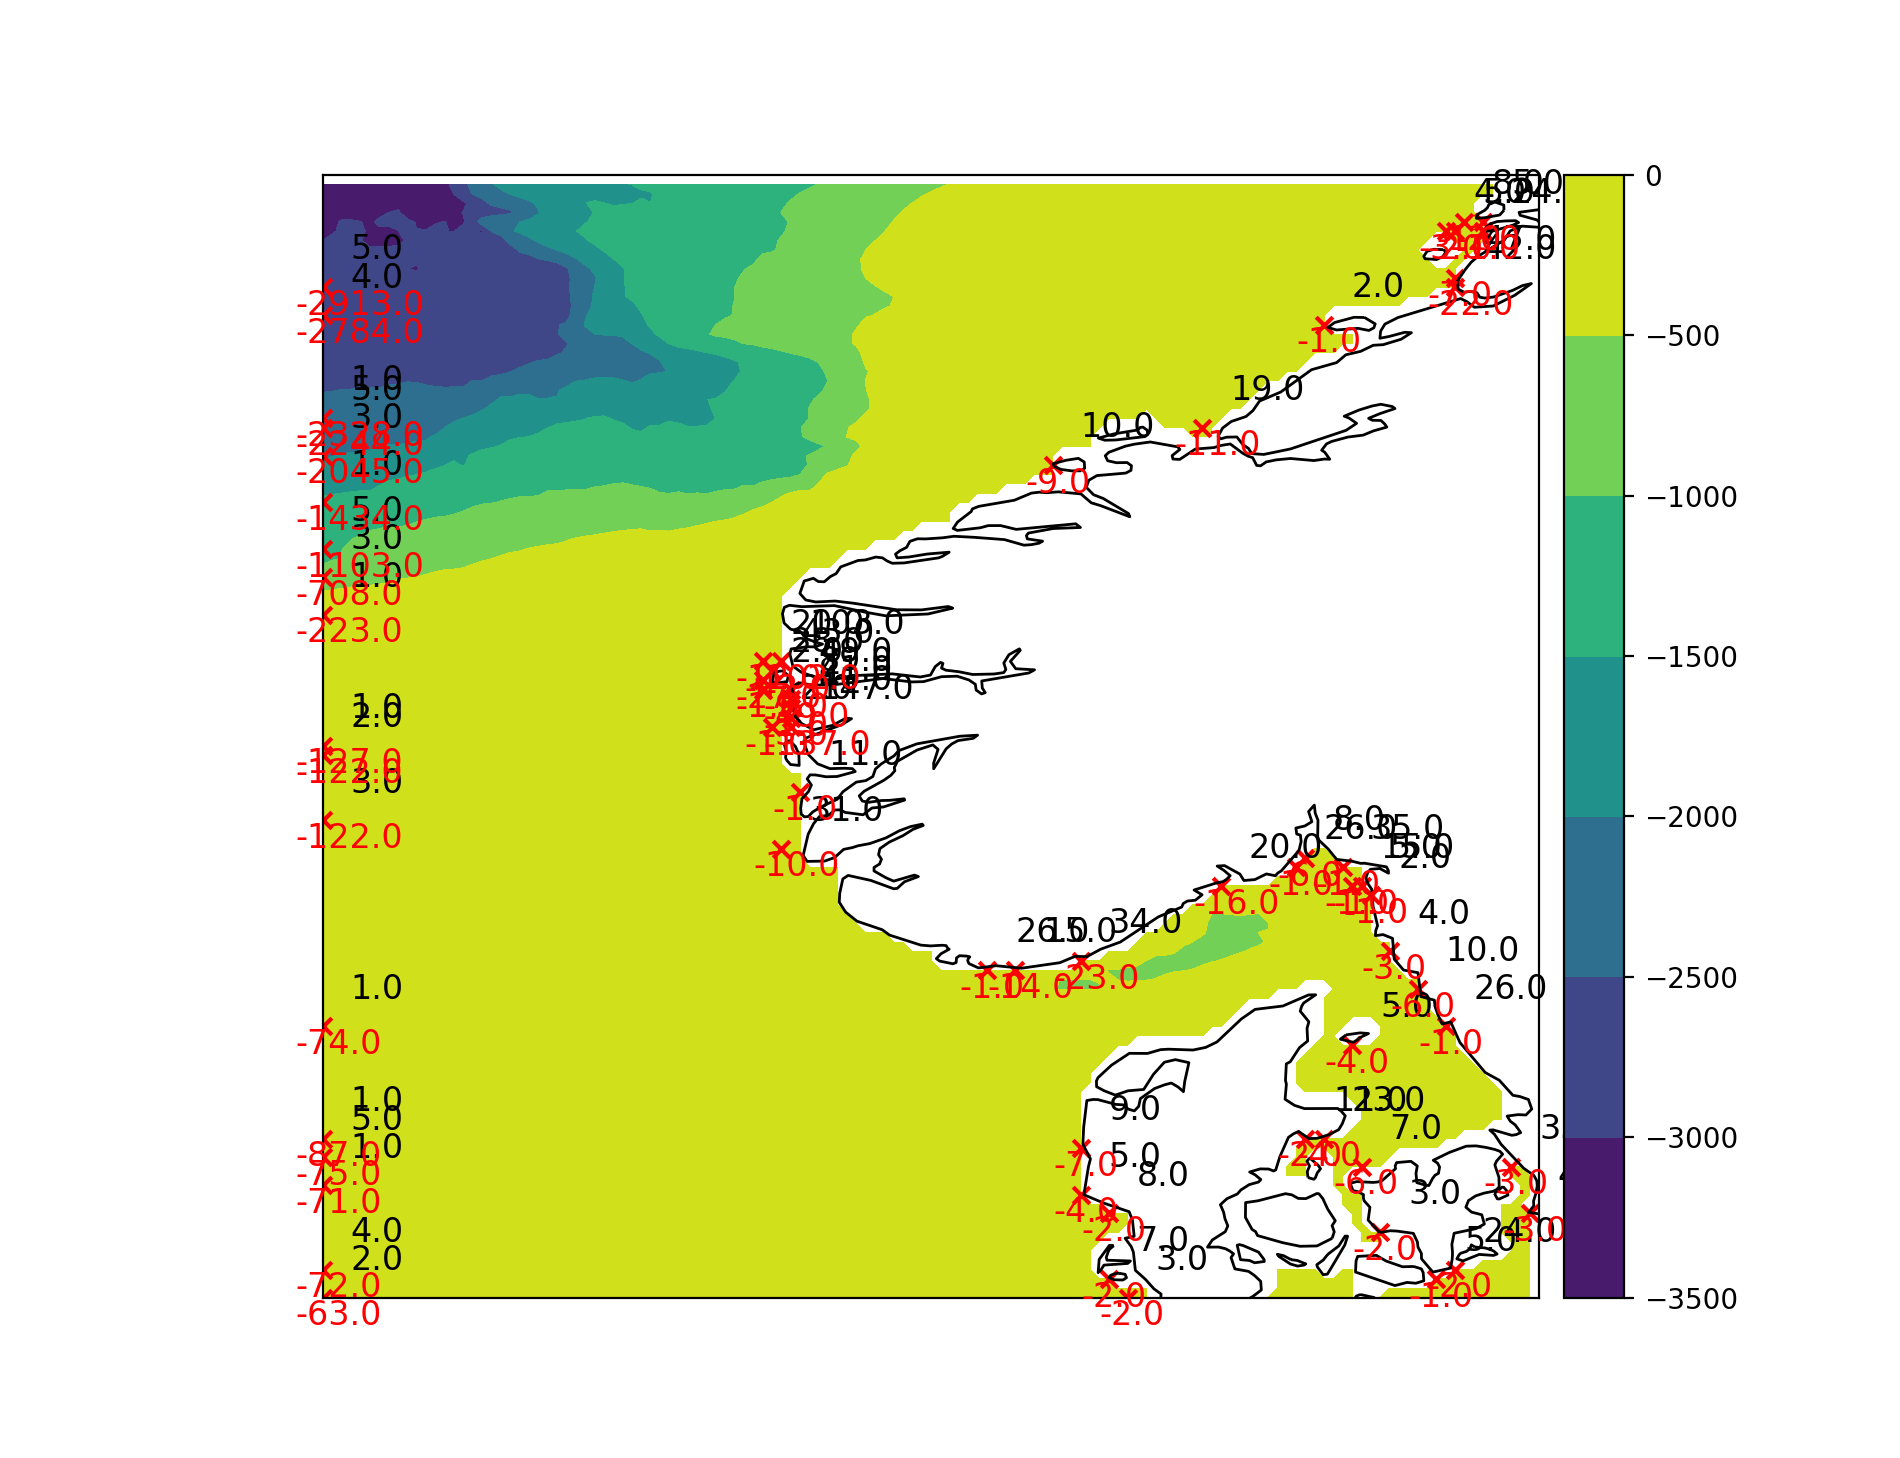

In [36]:
plt.figure()
m = Basemap(llcrnrlon=dic['minlon'], llcrnrlat=dic['minlat'], urcrnrlon=dic['maxlon'], urcrnrlat=dic['maxlat'],
            resolution='i')  # resolution = (l)ow | (i)intermediate | (h)igh
m.drawcoastlines()

In [37]:
m.contourf(gx,gy,b.Dataset.fval)
m.colorbar()

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

In [38]:
for [i,j] in fps:
    m.scatter(x[i,j],y[i,j],marker='x',color='r')
    plt.annotate(dif[i,j],  xy = (x[i,j],y[i,j]), xytext = (10, 10), textcoords = 'offset points',size='large', color='k')
    plt.annotate(b.Dataset.fval[i,j].values,  xy = (x[i,j],y[i,j]), xytext = (-10, -10), textcoords = 'offset points',size='large', color='r')